In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

age_percent = pd.read_csv('age_percent.csv')
age_percent

,date,0-17,18-49,50-64,65+
0,04-02,1.127502,49.816781,27.050644,22.005074
1,04-03,1.014370,50.016906,27.497887,22.485207
2,04-04,0.907098,49.965984,27.613576,22.420440
3,04-05,0.850340,50.304705,27.522676,22.172619
4,04-06,0.768590,49.657337,27.822968,22.519695
...,...,...,...,...,...
108,07-20,0.032815,66.014198,21.271412,12.714390
109,07-21,0.031818,66.132295,21.227074,12.640630
110,07-22,0.030943,66.230977,21.200111,12.568912
111,07-23,0.030262,66.267886,21.211877,12.520237


In [5]:
age_percent['days after 4-02'] = age_percent.index
if ('date' in age_percent.columns): 
    del age_percent['date']
age_percent

,0-17,18-49,50-64,65+,days after 4-02
0,1.127502,49.816781,27.050644,22.005074,0
1,1.014370,50.016906,27.497887,22.485207,1
2,0.907098,49.965984,27.613576,22.420440,2
3,0.850340,50.304705,27.522676,22.172619,3
4,0.768590,49.657337,27.822968,22.519695,4
...,...,...,...,...,...
108,0.032815,66.014198,21.271412,12.714390,108
109,0.031818,66.132295,21.227074,12.640630,109
110,0.030943,66.230977,21.200111,12.568912,110
111,0.030262,66.267886,21.211877,12.520237,111


In [8]:
cols = list(age_percent.columns.values)
#age_percent = age_percent[[cols[-1]] + [cols[0:4]]]
for i in ['0-17', '18-49', '50-64', '65+']:
    age_percent[i] =age_percent[i+"-new"]
    try:
        del age_percent[i+"-new"]
    except:
        continue
age_percent

,days after 4-02,0-17,18-49,50-64,65+
0,0,1.127502,49.816781,27.050644,22.005074
1,1,1.014370,50.016906,27.497887,22.485207
2,2,0.907098,49.965984,27.613576,22.420440
3,3,0.850340,50.304705,27.522676,22.172619
4,4,0.768590,49.657337,27.822968,22.519695
...,...,...,...,...,...
108,108,0.032815,66.014198,21.271412,12.714390
109,109,0.031818,66.132295,21.227074,12.640630
110,110,0.030943,66.230977,21.200111,12.568912
111,111,0.030262,66.267886,21.211877,12.520237


In [ ]:
age_percent.to_csv('age_percent2.csv')

In [19]:
x = age_percent.iloc[:, 0:1].values 
y = age_percent.iloc[:, 2:3].values 

27.862975011741355

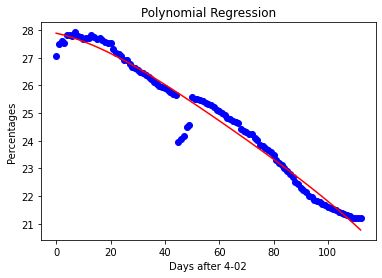

In [69]:
def predict(age_range, num_days):
    x = age_percent.iloc[:, 0:1].values 
    y = age_percent.iloc[:, age_range:age_range+1].values 
    
    # Fitting Linear Regression to the dataset 
    from sklearn.linear_model import LinearRegression 
    lin = LinearRegression() 

    lin.fit(x, y) 
    # Fitting Polynomial Regression to the dataset 
    from sklearn.preprocessing import PolynomialFeatures 

    poly = PolynomialFeatures(degree = 4) 
    x_poly = poly.fit_transform(x) 

    poly.fit(x_poly, y) 
    lin2 = LinearRegression() 
    lin2.fit(x_poly, y) 
    #Visualising the Polynomial Regression results 
    plt.scatter(x, y, color = 'blue') 

    plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
    plt.title('Polynomial Regression') 
    plt.xlabel('Days after 4-02') 
    plt.ylabel('Percentages') 

    #plt.show() 
    return lin2.predict(poly.fit_transform([[num_days]]))[0][0]
    
    

predict(3, 1)

In [70]:
lin2.predict(poly.fit_transform([[150]]))[0][0]

80.8437353555293

In [71]:
age_percent.columns

Index(['days after 4-02', '0-17', '18-49', '50-64', '65+'], dtype='object')

,days after 4-02,0-17,18-49,50-64,65+
0,113,0.066122,67.251550,20.687961,12.010599
1,114,0.074380,67.436785,20.594617,11.908206
2,115,0.083595,67.619262,20.500114,11.808770
3,116,0.093818,67.798897,20.404412,11.712371
4,117,0.105098,67.975606,20.307470,11.619091
5,118,0.117484,68.149303,20.209248,11.529010
6,119,0.131028,68.319902,20.109704,11.442207
7,120,0.145783,68.487320,20.008794,11.358763
8,121,0.161803,68.651472,19.906476,11.278758
9,122,0.179142,68.812271,19.802706,11.202273


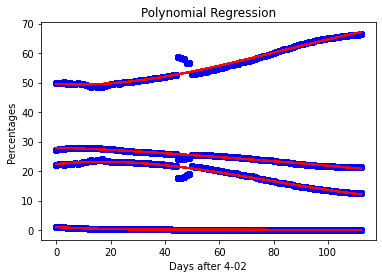

In [72]:
age_percent_predict = {}
for i in list(age_percent.columns):
    age_percent_predict[i] = []

for i in range(len(age_percent['18-49']), len(age_percent['18-49'])+60):
    age_percent_predict['days after 4-02'].append(i)
    age_percent_predict['0-17'].append(predict(1, i))
    age_percent_predict['18-49'].append(predict(2,i))
    age_percent_predict['50-64'].append(predict(3,i))
    age_percent_predict['65+'].append(predict(4,i))
        
age_percent_predict_df = pd.DataFrame(data = age_percent_predict)
age_percent_predict_df

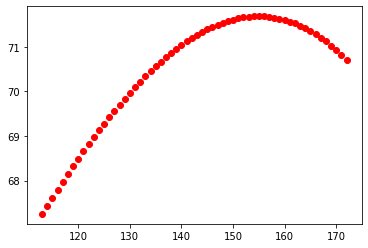

In [73]:
columns = list(age_percent_predict_df.columns)
x2 = age_percent_predict_df[columns[0]]
y2 = age_percent_predict_df[columns[2]]
plt.scatter(x2, y2, color = 'red') 

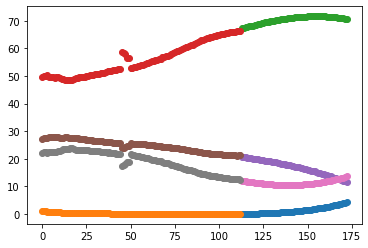

In [74]:
#plt.scatter(x, y, color = 'blue') 
#plt.scatter(x2, y2, color = 'green') 
for i in columns[1:]:
    plt.scatter(age_percent_predict_df[columns[0]], age_percent_predict_df[i])
    plt.scatter(age_percent[columns[0]], age_percent[i])